In [ ]:
#Importing Libraries------------------------------------------------------------------------------------------------------------------

from sklearn.neural_network import MLPClassifier , MLPRegressor # MLPClassifier & MLPRegressor : for Classification & Regression

from sklearn.model_selection import train_test_split # train_test_split : to split data into two parts(Train & Valid)

from pandas import read_excel , concat , DataFrame # read_excel : importing excel files / concat : for repeating and concatenate data /

from sklearn.preprocessing import StandardScaler # StandardScaler : for preprocessing like making a (zero mean & one STD) samples

from sklearn.metrics import mean_squared_error , confusion_matrix # mean_squared_error & confusion_matrix : to calculate MSE & confusion matrix

from sklearn.utils import shuffle # Shuffle : to shuffle data for mixing ones and zeros

from matplotlib import pyplot # pyplot : for Plotting


In [ ]:
#Reading Data-------------------------------------------------------------------------------------------------------------------------

Data   = read_excel( r'/content/traindataset_for_intro_to_ml.xlsx' ).iloc[:,1:9] # Read All Data #(Make Sure you have uploaded your data)

Input  = Data.iloc[:,0:6] # Define Input Data

Output = Data.iloc[:,6:8] # Define Output Data


In [ ]:
#Calculating The number of Data in each Range-----------------------------------------------------------------------------------------

#Outcome_Ones  = 0
#Outcome_Zeros = 0
#less_10 = 0
#less_20 = 0
#less_30 = 0
#less_40 = 0
#less_50 = 0
#less_60 = 0
#less_70 = 0
#less_80 = 0
#less_90 = 0
#less_100 = 0

#for i in range(len(Output)) :
    #Start------------------------------------
 #   if Output.Outcome[i] == 1 :
 #      Outcome_Ones  += 1 
 #   elif Output.Outcome[i] == 0 :
 #     Outcome_Zeros += 1
    #-----------------------------------------
 #   if Output.values[i,0] <= 10 :
 #      less_10 += 1 
 #   if Output.values[i,0] <= 20 :
 #      less_20 += 1
 #   if Output.values[i,0] <= 30 :
 #      less_30 += 1
 #   if Output.values[i,0] <= 40 :
 #      less_40 += 1
 #   if Output.values[i,0] <= 50 :
 #      less_50 += 1
 #   if Output.values[i,0] <= 60 :
 #      less_60 += 1
 #   if Output.values[i,0] <= 70 :
 #      less_70 += 1
 #   if Output.values[i,0] <= 80 :
 #      less_80 += 1
 #   if Output.values[i,0] <= 90 :
 #      less_90 += 1
 #  if Output.values[i,0] <= 100 :
 #      less_100 += 1
    #End--------------------------------------

#Btwn_0_to_10   = less_10
#Btwn_10_to_20  = less_20 -  less_10
#Btwn_20_to_30  = less_30 -  less_20
#Btwn_30_to_40  = less_40 -  less_30
#Btwn_40_to_50  = less_50 -  less_40
#Btwn_50_to_60  = less_60 -  less_50
#Btwn_60_to_70  = less_70 -  less_60
#Btwn_70_to_80  = less_80 -  less_70
#Btwn_80_to_90  = less_90 -  less_80
#Btwn_90_to_100 = less_100 - less_90

#print(Btwn_0_to_10)   # No Data
#print(Btwn_10_to_20)  # Low Data
#print(Btwn_20_to_30)  # Enough Data
#print(Btwn_30_to_40)  # Enough Data
#print(Btwn_40_to_50)  # Enough Data
#print(Btwn_50_to_60)  # Low Data
#print(Btwn_60_to_70)  # No Data
#print(Btwn_70_to_80)  # No Data
#print(Btwn_80_to_90)  # No Data
#print(Btwn_90_to_100) # No Data

# So we need to 3X Data between 10 to 20 & 50 to 60


In [ ]:
#PreProcessing------------------------------------------------------------------------------------------------------------------------

temp1   = Data [ 10 < Data['Twoyears.follow_up.Cobb'] ]
temp1   = temp1[ temp1['Twoyears.follow_up.Cobb'] <= 20 ] # Find Data between (10,20]

temp2   = Data [ 50 < Data['Twoyears.follow_up.Cobb'] ]
temp2   = temp2[ temp2['Twoyears.follow_up.Cobb'] <= 60 ] # Find Data between (50,60]

for i in range(3) : # Repeat the above samples 3 times for each temp1 & temp2
    Data  = concat([Data, temp1])
    Data  = concat([Data, temp2])

for i in range(200): # Shuffle the data many time to make sure they've got mixed
  Data = shuffle(Data)

Input = Data.iloc[:,0:6] # Define Input Data
Output = Data.iloc[:,6:8] # Define Output Data


In [ ]:
#Validation---------------------------------------------------------------------------------------------------------------------------

[ Input_Train , Input_Valid , Output_Train , Output_Valid ] = train_test_split( Input , Output , test_size= 0.1 ) # Normal Validation(10 percent of the concatenated data)


In [ ]:
# For Test , Run This Section--------------------------------------------------------------------------------------------------------

#Input_Train  = Input
#Output_Train = Output
#Test_Data    = read_excel( r'/content/YourFileName' ).iloc[:,1:9] # Put your filename on designated place
#Input_Valid  = Test_Data.iloc[:,0:6]
#Output_Valid = Test_Data.iloc[:,6:8]


In [ ]:
#PreProcessing(Normalization : Zero-Mean & One-STD)-----------------------------------------------------------------------------------

Scaler  = StandardScaler().fit(Input_Train.values) # Find Mean & Standard Deviation of the Train Data
Input_Train = Scaler.transform(Input_Train.values) # Normalize the Train Data using previous mean & STD 
Input_Valid = Scaler.transform(Input_Valid.values) # Normalize the Valid Data using previous mean & STD 


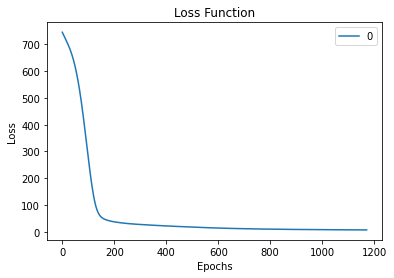

In [ ]:
#Model---------------------------------------------------------------------------------------------------------------------------------

Classifier = MLPClassifier( hidden_layer_sizes=(64) ,activation = 'logistic', solver = 'lbfgs' , learning_rate = 'adaptive' , max_iter = 2000 , early_stopping = True , validation_fraction = 0.15 , n_iter_no_change = 32)
# Define our model with defined parameters
Regressor  = MLPRegressor ( hidden_layer_sizes=(64,32) , solver = 'adam' , learning_rate = 'adaptive' , max_iter = 2000 , early_stopping = True , validation_fraction = 0.15 , n_iter_no_change = 32) 
# Define our model with defined parameters
Classifier.fit( Input_Train , Output_Train.iloc[:,1] ) # fit the model

Regressor.fit(Input_Train , Output_Train.iloc[:,0] ) # fit the model

Model_Output_Valid = Classifier.predict( Input_Valid ) # predict using the model(Valid-Classification)

Model_Output_Train = Classifier.predict( Input_Train ) # predict using the model(Train-Classification)

DataFrame(Regressor.loss_curve_).plot() ; pyplot.title("Loss Function") ; pyplot.ylabel("Loss") ; pyplot.xlabel("Epochs") ; # Plot Loss Function


In [ ]:
#Accuracy & Confusion Matrix For Train Data------------------------------------------------------------------------------------------------

Classifier_Score_Train = Classifier.score( Input_Train , Output_Train.iloc[:,1] ) # Accuracy on Train Classifier

Regressor_Score_Train  = Regressor.score( Input_Train , Output_Train.iloc[:,0] ) # Accuracy on Train Regressor

Regressor_MSE_Train = mean_squared_error( Output_Train.iloc[:,0] , Regressor.predict( Input_Train ) ) # Mean Square Error Train Data

Confusion_Matrix_Train =  confusion_matrix( Output_Train.iloc[:,1] , Model_Output_Train ) # Confusion Matrix of Train Data

print("Classifier Accuracy on Train Data :" , Classifier_Score_Train , '\n')
print("Regressor Accuracy on Train Data :" , Regressor_Score_Train , '\n')
print("Regressor MSE on Train Data :" , Regressor_MSE_Train , '\n')
print("Confusion Matrix on Train Data : \n\n" , Confusion_Matrix_Train , '\n')


Classifier Accuracy on Train Data : 1.0 

Regressor Accuracy on Train Data : 0.9189239865396285 

Regressor MSE on Train Data : 15.635958687505077 

Confusion Matrix on Train Data : 

 [[104   0]
 [  0  28]] 



In [ ]:
#Accuracy & Confusion Matrix For Valid Data------------------------------------------------------------------------------------------------

Classifier_Score_Valid = Classifier.score( Input_Valid , Output_Valid.iloc[:,1] ) # Accuracy on Valid Classifier

Regressor_Score_Valid  = Regressor.score( Input_Valid , Output_Valid.iloc[:,0] ) # Accuracy on Valid Regressor

Regressor_MSE_Valid = mean_squared_error( Output_Valid.iloc[:,0] , Regressor.predict( Input_Valid ) ) # Mean Square Error Valid Data

Confusion_Matrix_Valid =  confusion_matrix( Output_Valid.iloc[:,1] , Model_Output_Valid ) # Confusion Matrix of Valid Data

print("Classifier Accuracy on Test Data :" , Classifier_Score_Valid , '\n')
print("Regressor Accuracy on Test Data :" , Regressor_Score_Valid , '\n')
print("Regressor MSE on Test Data :" , Regressor_MSE_Valid , '\n')
print("Confusion Matrix on Test Data : \n\n" , Confusion_Matrix_Valid , '\n')


Classifier Accuracy on Test Data : 1.0 

Regressor Accuracy on Test Data : 0.9210348380677759 

Regressor MSE on Test Data : 13.603065228857812 

Confusion Matrix on Test Data : 

 [[11  0]
 [ 0  4]] 

